In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

In [9]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
len(test_data)

10000

In [14]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

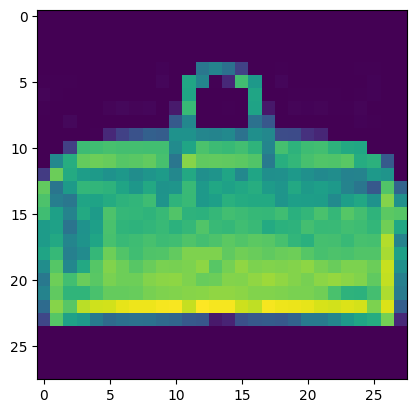

In [17]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[3700]);

In [28]:
import tensorflow as tf
import pandas as pd

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Count the number of occurrences of each value in y_train
value_counts = pd.Series(y_train).value_counts().sort_values(ascending=False)

# Display the value counts in descending order
print(value_counts)
len(value_counts)

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64


10

In [ ]:
len

In [24]:
import numpy as np
idx = np.argsort(train_labels)[::-1]
y_train_sorted = train_labels[idx]
y_train_sorted

array([9, 9, 9, ..., 0, 0, 0], dtype=uint8)

In [19]:
y_train_series = pd.Series(train_labels)


In [29]:
value_counts = y_train_series.value_counts()
value_counts = y_train_series.value_counts().sort_values(ascending=False)

value_counts

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assign class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select 4 random images from the test data
num_images = 4
random_indices = np.random.randint(0, len(test_images), size=num_images)

# Plot the images along with actual and predicted labels
plt.figure(figsize=(12, 4))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    actual_label = class_names[test_labels[index]]
    predicted_label = class_names[np.argmax(predictions[index])]
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()


In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

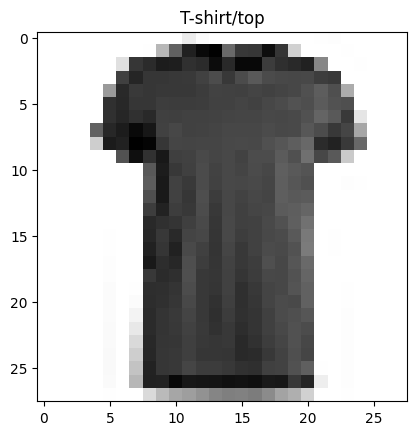

In [32]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

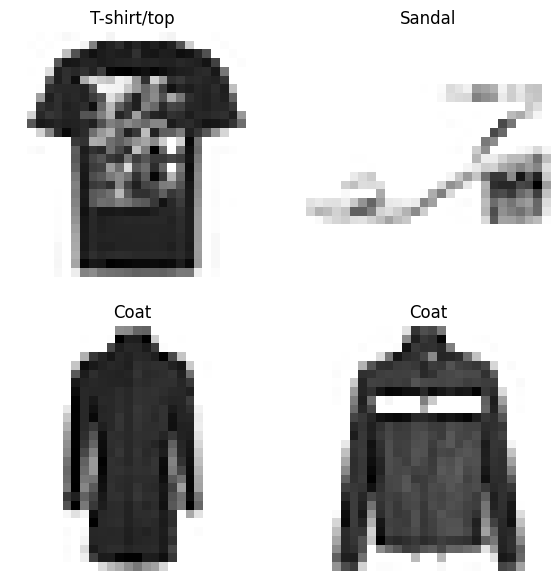

In [34]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Pre-process the data
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Create the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# Configure callbacks
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', save_best_only=True)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
model.fit(train_images, train_labels, 
          batch_size=256,
          epochs=50, 
          validation_split=0.2,
          callbacks=[checkpoint, early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Make predictions
predictions = model.predict(test_images)


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


188/188 [==============================] - 16s 15ms/step - loss: 0.6486 - accuracy: 0.7778 - val_loss: 2.3914 - val_accuracy: 0.3977
Epoch 2/50
188/188 [==============================] - 2s 12ms/step - loss: 0.4138 - accuracy: 0.8523 - val_loss: 1.1988 - val_accuracy: 0.6143
Epoch 3/50
188/188 [==============================] - 2s 11ms/step - loss: 0.3562 - accuracy: 0.8716 - val_loss: 0.4407 - val_accuracy: 0.8447
Epoch 4/50
188/188 [==============================] - 2s 11ms/step - loss: 0.3260 - accuracy: 0.8816 - val_loss: 0.3122 - val_accuracy: 0.8828
Epoch 5/50
188/188 [==============================] - 2s 12ms/step - loss: 0.3038 - accuracy: 0.8895 - val_loss: 0.2913 - val_accuracy: 0.8889
Epoch 6/50
188/188 [==============================] - 2s 12ms/step - loss: 0.2925 - accuracy: 0.8943 - val_loss: 0.2536 - val_accuracy: 0.9060
Epoch 7/50
188/188 [==============================] - 2s 11ms/step - loss: 0.2792 - accuracy: 0.8983 - val_loss: 0.2800 - val_accuracy: 0.8976
Epoch 8/5

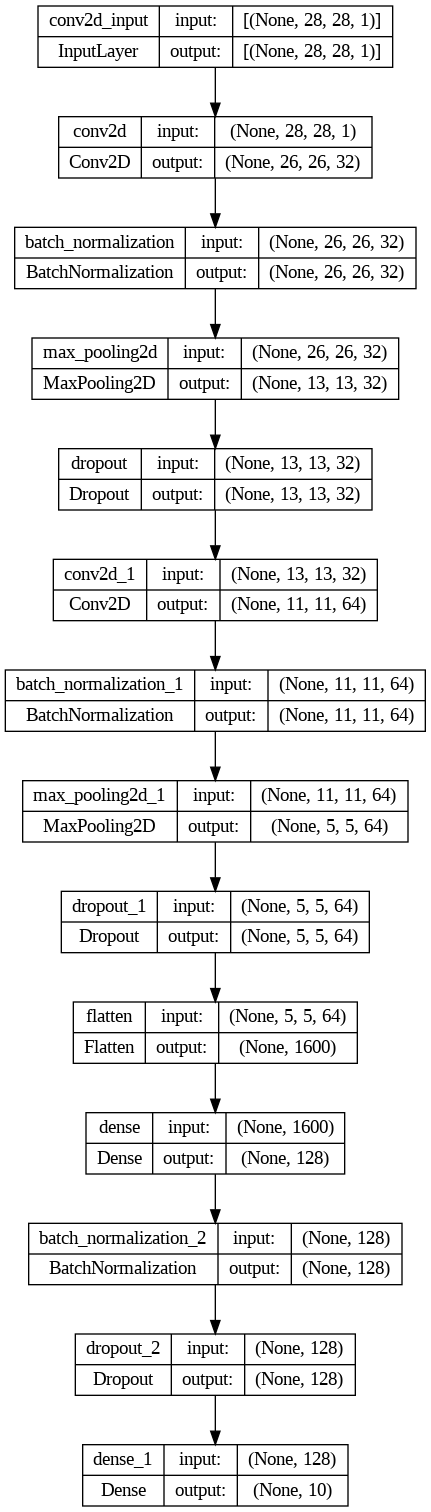

In [22]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model, show_shapes=True)

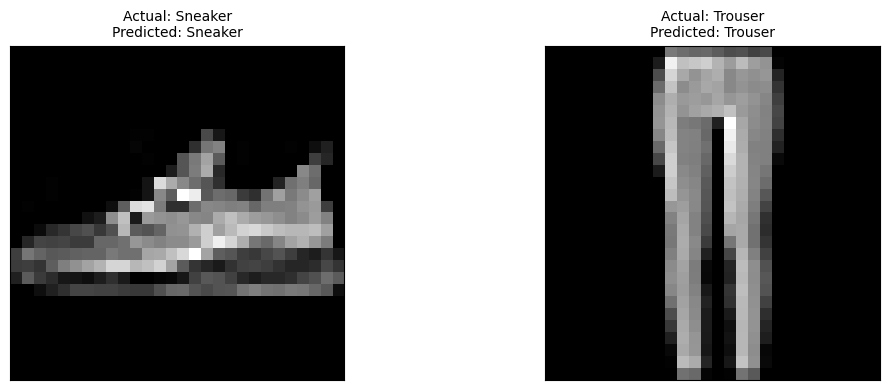

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assign class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select 4 random images from the test data
num_images = 2
random_indices = np.random.randint(0, len(test_images), size=num_images)

# Plot the images along with actual and predicted labels
plt.figure(figsize=(12, 4))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    actual_label = class_names[test_labels[index]]
    predicted_label = class_names[np.argmax(predictions[index])]
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}", fontsize=10)

plt.tight_layout()
plt.show()


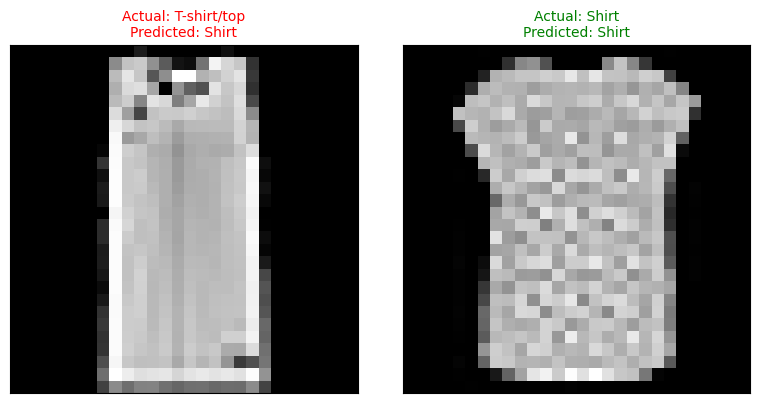

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assign class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select 2 random images from the test data
num_images = 2
random_indices = np.random.randint(0, len(test_images), size=num_images)

# Plot the images along with actual and predicted labels
plt.figure(figsize=(8, 4))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    actual_label = class_names[test_labels[index]]
    predicted_label = class_names[np.argmax(predictions[index])]
    title_color = 'green' if actual_label == predicted_label else 'red'
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}",
              fontsize=10, color=title_color)

plt.tight_layout()
plt.show()


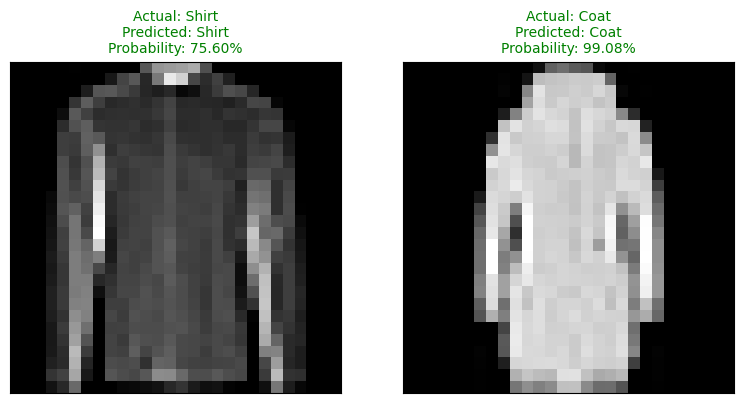

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assign class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select 2 random images from the test data
num_images = 2
random_indices = np.random.randint(0, len(test_images), size=num_images)

# Plot the images along with actual and predicted labels and prediction probabilities
plt.figure(figsize=(8, 4))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    actual_label = class_names[test_labels[index]]
    predicted_label = class_names[np.argmax(predictions[index])]
    prediction_probability = np.max(predictions[index]) * 100
    title_color = 'green' if actual_label == predicted_label else 'red'
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}\nProbability: {prediction_probability:.2f}%",
              fontsize=10, color=title_color)

plt.tight_layout()
plt.show()


In [24]:
# Make predictions with the most recent model
y_probs = model.predict(test_images) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.8575405e-07, 1.2618957e-06, 7.0940651e-08, 6.8954648e-08,
        1.2390477e-07, 4.0383934e-06, 5.8921007e-08, 4.4394509e-04,
        3.3117618e-07, 9.9954981e-01],
       [4.0698913e-05, 1.8039831e-08, 9.9993050e-01, 3.0891272e-08,
        3.8999242e-06, 6.2111600e-09, 2.4878464e-05, 7.1945622e-10,
        7.2668747e-09, 1.1065173e-09],
       [2.5450622e-10, 1.0000000e+00, 1.2321867e-10, 1.1691667e-09,
        3.0038194e-10, 9.4981167e-10, 1.0154331e-09, 1.4502904e-10,
        2.0834928e-10, 4.4509987e-10],
       [5.4507083e-11, 1.0000000e+00, 5.4961209e-11, 5.5962363e-10,
        2.0725861e-09, 3.0614334e-11, 3.4833886e-10, 5.2300407e-11,
        3.5921179e-11, 1.0468390e-10],
       [5.0469618e-02, 1.1808538e-07, 4.3649022e-03, 8.1044316e-05,
        7.7461018e-03, 6.5143145e-06, 9.3733037e-01, 4.0416927e-07,
        1.0358379e-07, 8.4448862e-07]], dtype=float32)

In [26]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [27]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [28]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[903,   0,  19,  12,   1,   2,  57,   0,   6,   0],
       [  1, 981,   0,   8,   2,   0,   6,   0,   2,   0],
       [ 16,   0, 908,   7,  36,   0,  33,   0,   0,   0],
       [ 11,   3,  13, 926,  19,   0,  26,   0,   2,   0],
       [  0,   0,  49,  22, 868,   0,  59,   0,   2,   0],
       [  0,   0,   0,   0,   0, 985,   0,  10,   0,   5],
       [124,   1,  77,  25,  52,   0, 715,   0,   6,   0],
       [  0,   0,   0,   0,   0,   7,   0, 975,   0,  18],
       [  1,   0,   2,   4,   1,   3,   2,   2, 984,   1],
       [  0,   0,   0,   0,   0,   5,   0,  30,   0, 965]])

In [23]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

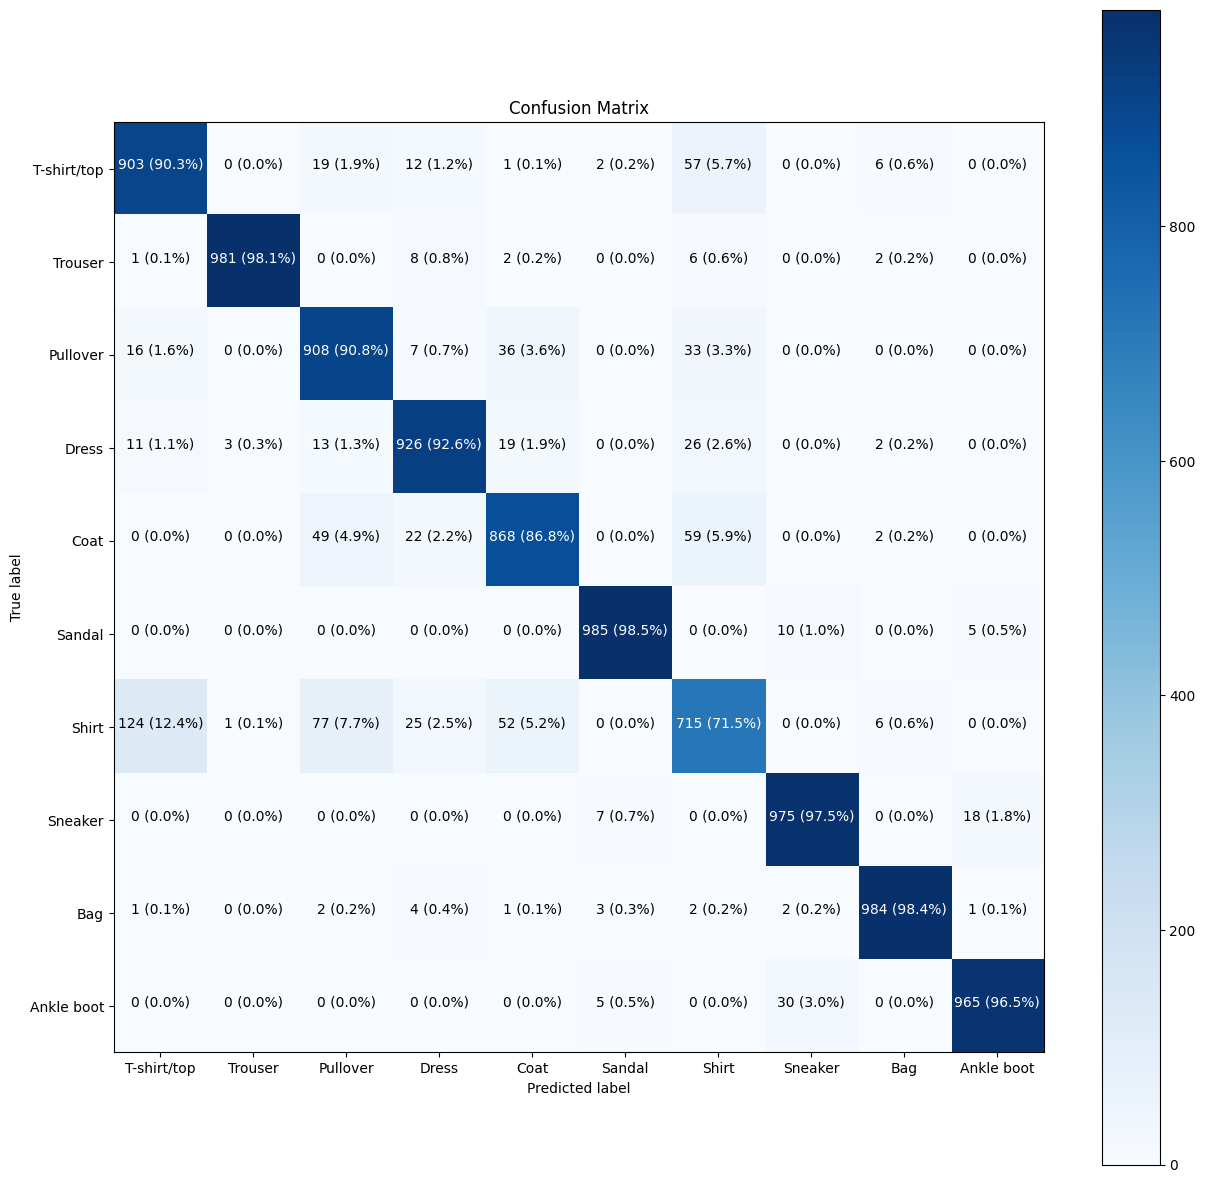

In [29]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [31]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

In [33]:
# Check out a random image as well as its prediction
plot_random_image(model=model, 
                  images=test_images, 
                  true_labels=test_labels, 
                  classes=class_names)

InvalidArgumentError: ignored

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])